### Descripción

* Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos. 

* Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.

* Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

### Ejercicio 1: Preparar el ambiente de trabajo

* Importe los módulos clásicos del trabajo en ciencia de datos.
* El archivo tiene el nombre compresive_strength_concrete.csv. Impórtelo y genere estadísticas descriptivas.

* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

from pygam import LinearGAM
from pygam.utils import generate_X_grid

import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 80 
sn.set_style('darkgrid')

In [2]:
df = pd.read_csv('compresive_strength_concrete.csv')


### Ejercicio 2: Descripción

* El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals).

* Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc.
* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

In [3]:
df.columns = ['Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer ','Coarse_Aggregate','Fine_Aggregate ','Age','Concrete_compressive_strength']
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer ',
       'Coarse_Aggregate', 'Fine_Aggregate ', 'Age',
       'Concrete_compressive_strength'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


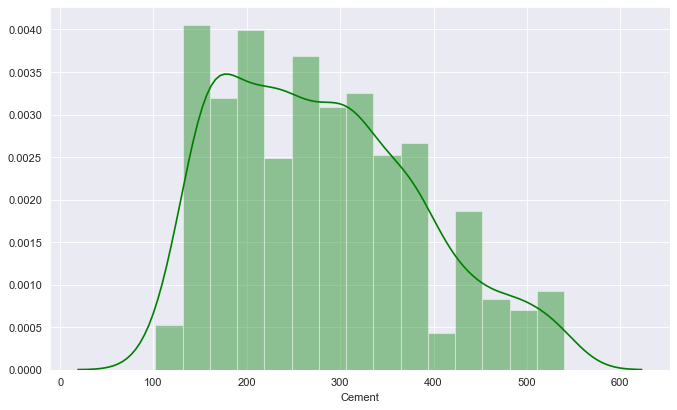

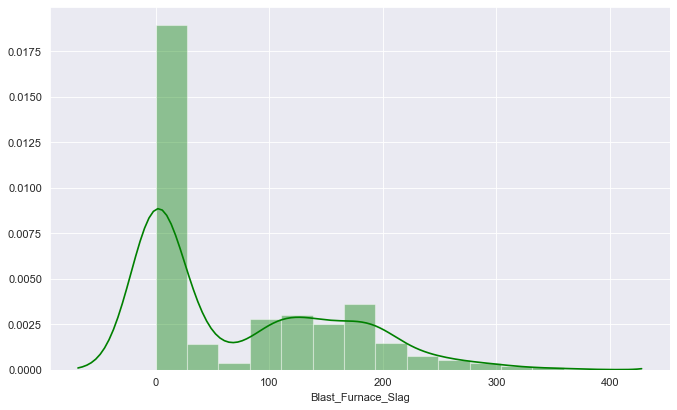

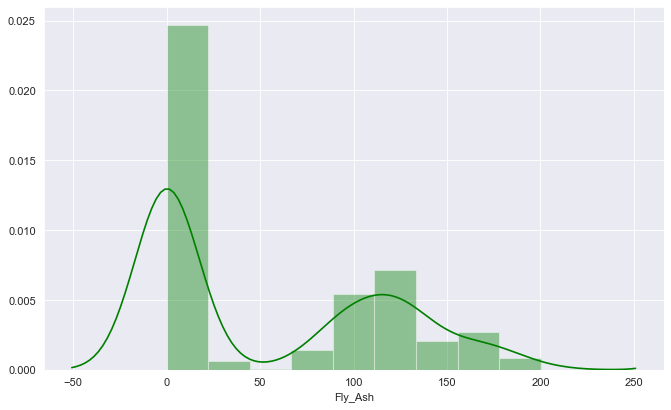

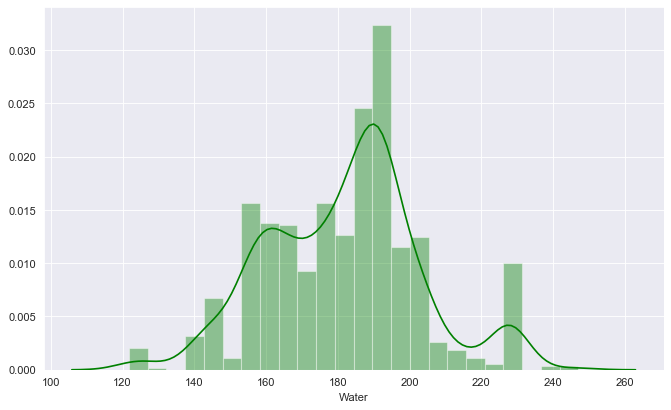

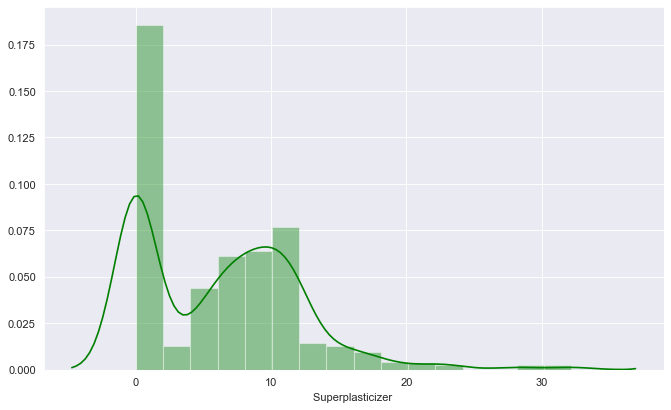

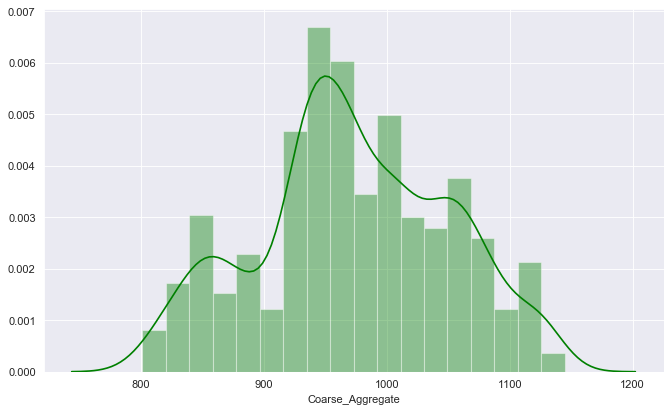

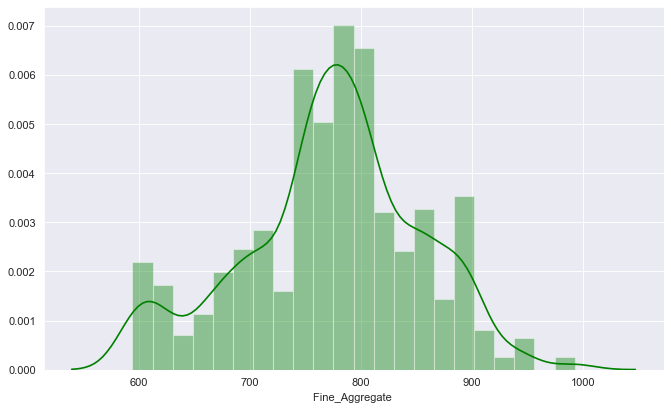

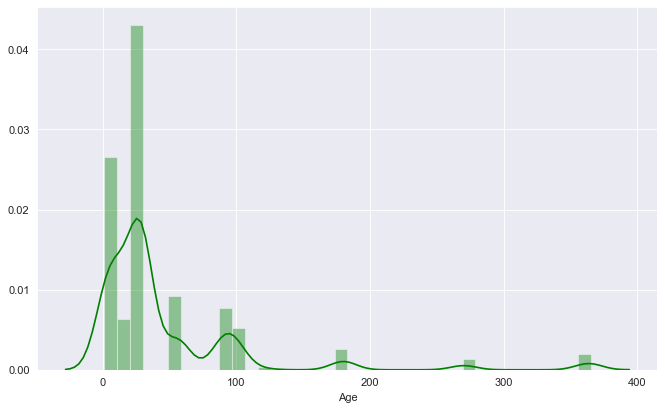

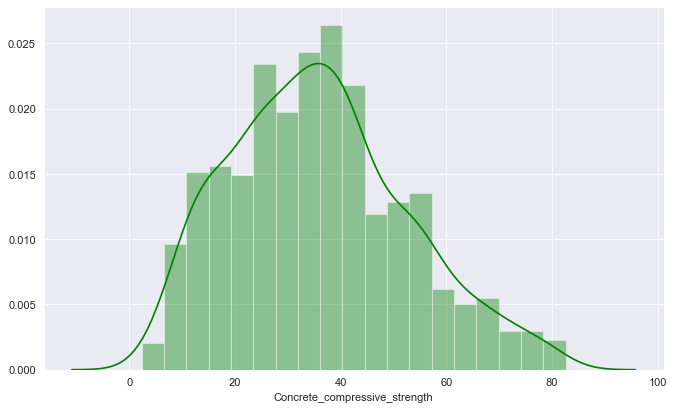

In [5]:
 # Reviso las distribuciones
for i in df.columns:
    plt.figure()
    sns.distplot(df[i], label=i, color='g')

In [6]:
 # Escalamos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

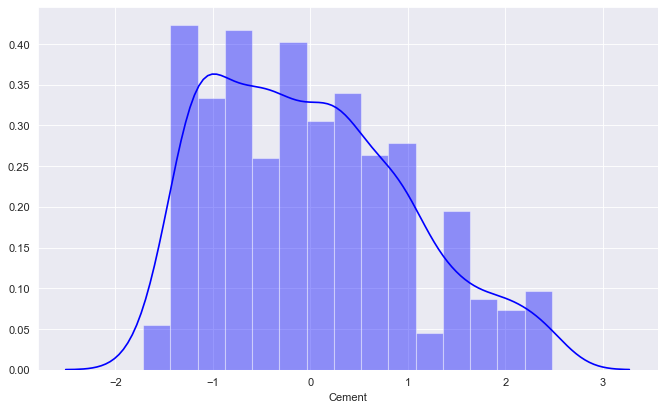

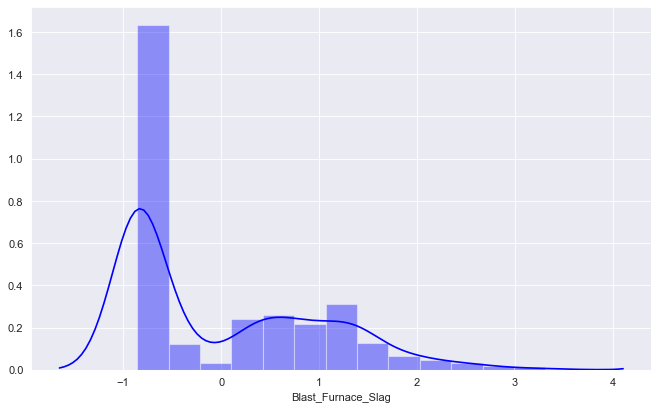

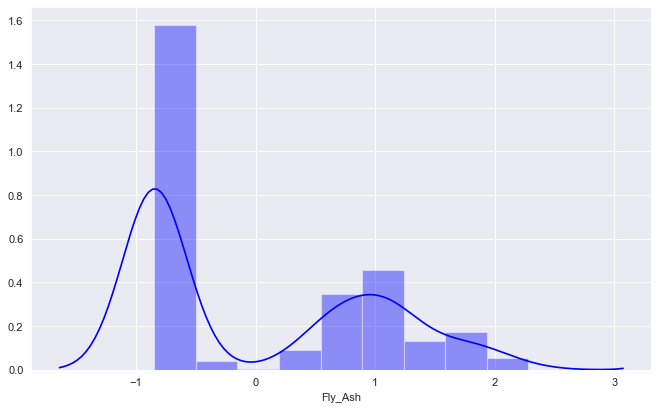

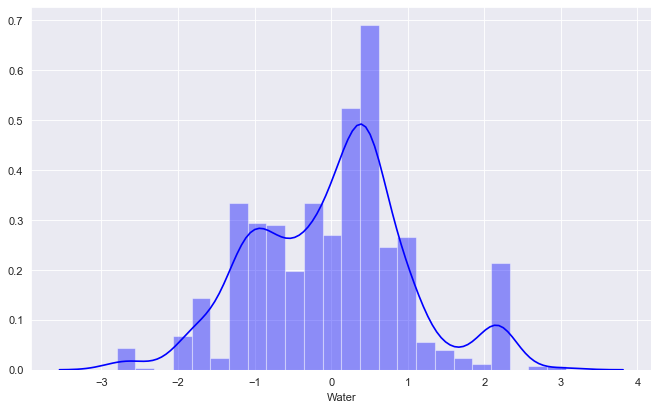

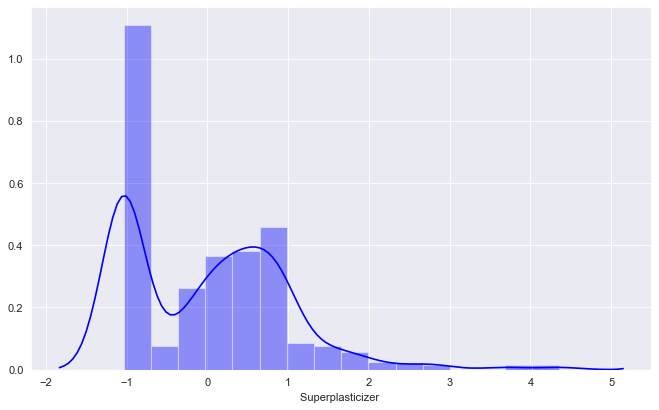

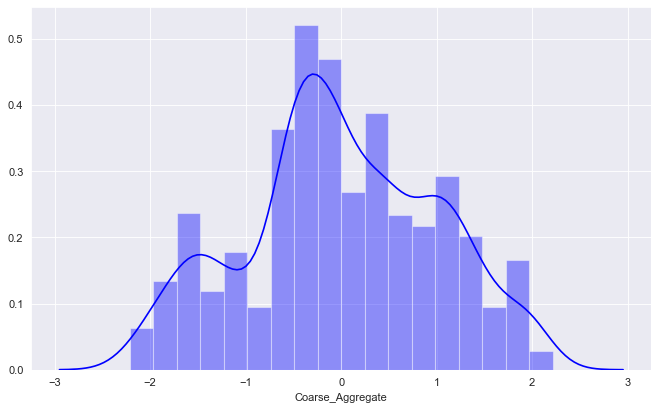

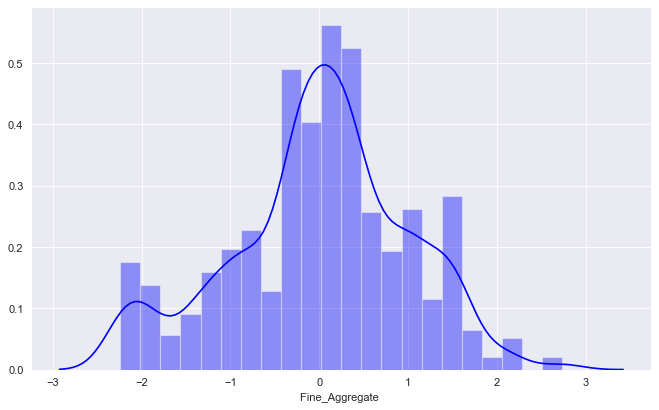

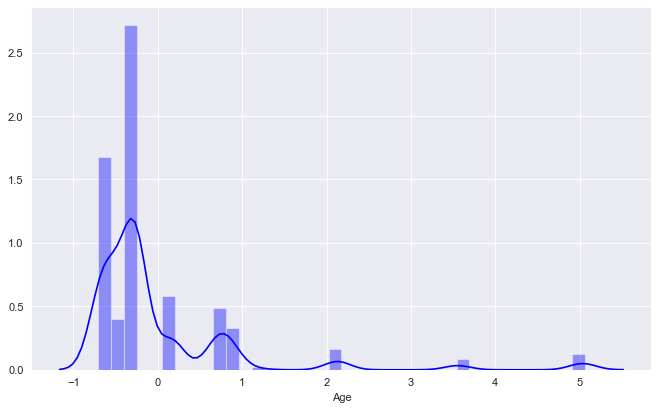

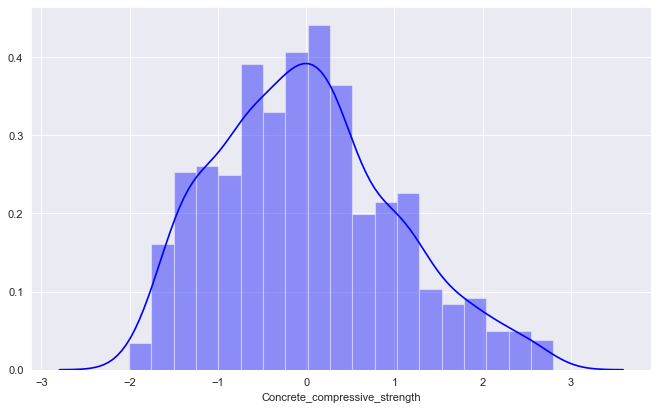

In [7]:
 # Reviso las distribuciones
for i in df_scaled.columns:
    plt.figure()
    sns.distplot(df_scaled[i], label=i, color='b')

### Ejercicio 3: Modelo

* En base al vector objetivo, decida el mejor modelo e impórtelo con pygam. Condicional a ésto, importe las métricas de desempeño asociadas.
* Genere conjuntos de entrenamiento y validación.
* Genere un primer modelo sin implementar la función gridsearch. Repórte el hiperparámetro lam así como las métricas de desempeño asociadas.
* Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. 
* Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

In [8]:
X = df_scaled.loc[:,'Cement':'Age']
y = df_scaled['Concrete_compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1625)

In [9]:
 # Genero el modelo gam1 sin la función gridsearch
gam1 = LinearGAM().fit(X_train, y_train)

In [10]:
# Genero el resumen
gam1.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.5144
Link Function:                     IdentityLink Log Likelihood:                                 -2463.2064
Number of Samples:                          721 AIC:                                             5119.4417
                                                AICc:                                            5149.6318
                                                GCV:                                                0.1151
                                                Scale:                                               0.088
                                                Pseudo R-Squared:                                   0.9209
Feature Function   Data Type      Num

In [11]:
 # Se evaluarán los siguientes lambdas 
lambdas = np.logspace(-3, 3, 50)
lambdas

array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
       2.81176870e-01, 3.72759372e-01, 4.94171336e-01, 6.55128557e-01,
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])

In [12]:
 # Genero modelo con gridsearch
search_params = {'lam': lambdas}
gam2 = LinearGAM().gridsearch(X_train, y_train, **search_params)
gam2.summary()

100% (50 of 50) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    110.0517
Link Function:                     IdentityLink Log Likelihood:                                 -2542.2031
Number of Samples:                          721 AIC:                                             5306.5096
                                                AICc:                                            5347.3786
                                                GCV:                                                 0.114
                                                Scale:                                              0.0832
                                                Pseudo R-Squared:                                    0.927
Feature Function   Data Type      Num

In [13]:
# Defino función para mostrar métricas de desempeño
def report_gam_metrics(model, X_test, y_test):
    print('Lambda: {0}'.format((model.lam)))
    print('Test R^2 accuracy: {0}'.format(r2_score(y_test, model.predict(X_test))))
    print('Test MSE accuracy: {0}'.format(mean_squared_error(y_test, model.predict(X_test))))
    print('Test RMSE accuracy: {0}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    print('Test MAE accuracy: {0}'.format(median_absolute_error(y_test, model.predict(X_test)))) 

In [14]:
 # Primero modelo
report_gam_metrics(gam1, X_test, y_test)

Lambda: 0.6
Test R^2 accuracy: 0.9034649614229497
Test MSE accuracy: 0.10414572424581547
Test RMSE accuracy: 0.32271616669422604
Test MAE accuracy: 0.20298349857037945


In [15]:
# Segundo modelo
report_gam_metrics(gam2, X_test, y_test)

Lambda: 0.21209508879201905
Test R^2 accuracy: 0.9015677280688836
Test MSE accuracy: 0.10619253278948045
Test RMSE accuracy: 0.3258719576604904
Test MAE accuracy: 0.1854632077044167


Comentario: Dado que las métricas son muy similares, nos quedaremos con el segundo modelo ya que presenta una mayor diferencia en el MAE (con un valor inferior). Sin embargo se podría intentar corregir este rango considerando el desempeño del modelo por defecto.

### Ejercicio 4: Dependencia Parcial

* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
* Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
* Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de resistencia.

In [16]:
 # Generamos la función
def dep_parcial(gam):
    x_grid = generate_X_grid(gam)
    attribute = X_train.columns
    N = attribute.shape[0]
    rows = np.ceil(len(attribute) / N)
    for i, n in enumerate(range(len(attribute))):
        plt.rcParams["figure.figsize"] = (14, 4)
        plt.subplot(2, 4, i + 1)
        partial_dep, confidence_intervals = gam.partial_dependence(x_grid, feature = i + 1, width=0.95)
        plt.plot(x_grid[:, n], partial_dep, color='crimson')
        plt.fill_between(x_grid[:, n],
                         confidence_intervals[0][:, 0],
                         confidence_intervals[0][:, 1],
                         color='crimson', alpha=.25)
        plt.title(attribute[n])
        plt.plot(X_train[attribute[n]],
                 [plt.ylim()[0]] * len(X_train[attribute[n]]),'|', color='grey', alpha=.8)
    plt.tight_layout()

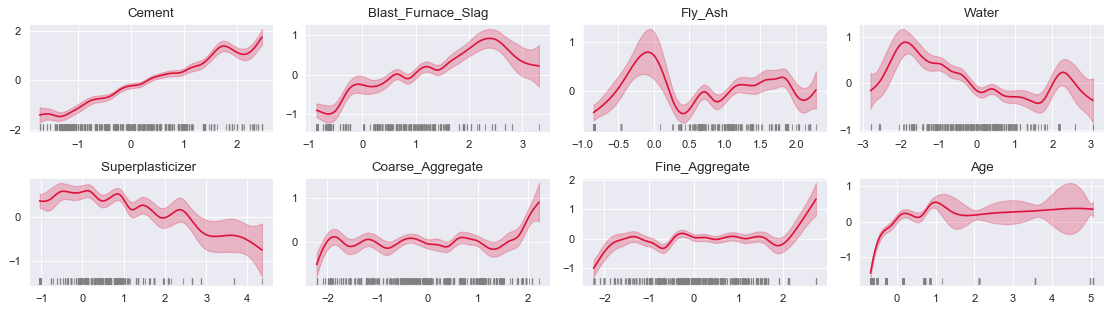

In [17]:
 dep_parcial(gam2)

__Comentario:__ Podemos concluir que cada atributo influye en mayor o menor nivel de resistencia, esto es:
* `Cement` indica que aumentaría la resistencia en la medida que este aumente.
* `Blast Furnace Slag` también tendría un comportamiento casi lineal donde aumenta junto con la resistencia.
* `Fly Ash` también tiene un comportamiento que nos indica cierta tendencia a aumentar junto con la resistencia.
* `Water` nos indica que a mayor nivel tiene un efecto negativo en la resistencia.
* `Superplasticizer` indica que a mayor nivel podría decender la resistencia.
* `Coarse Aggregate` nos indica que en ciertas cantidades presenta mejor resistencia.
* `Fine Aggregate` también nos indica que en determinadas cantidades presentará mejor resistencia.
* `Age` nos indica que valores cercanos a _1_ se puede apreciar un mejor desempeño con la resistencia.